In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from glob import glob

In [6]:
obj = np.zeros((6*9, 3), np.float32)
obj[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

objpoints = []
imgpoints = []

In [5]:
images = glob('camera_cal/calibration*.jpg')

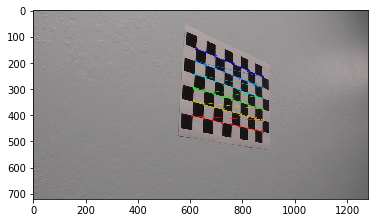

In [8]:
for name in images:
    img = cv2.imread(name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(obj)
        
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #cv2.imshow("img", img)
        #cv2.waitKey(500)
#cv2.destroyAllWindows()       